In [256]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

plt.style.use('ggplot')

In [232]:
df = pd.read_csv("accident_report.csv")
df.head()


,ContactDate,Beat,Race,Sex,EncounterType,ReasonForEncounter,Search,TypeOfSearch,ResultOfSearch,ResultOfEncounter,IntelligenceLedFactor
0,1-Jan,27Y,Hispanic,Male,Pedestrian,Reasonable Suspicion,Yes,Cursory,None,No Action,No
1,1-Jan,27Y,Hispanic,Male,Pedestrian,Reasonable Suspicion,Yes,Cursory,None,No Action,No
2,1-Jan,27Y,Other,Male,Pedestrian,Reasonable Suspicion,Yes,Cursory,None,No Action,No
3,1-Jan,04X,White,Male,Pedestrian,Probable Cause,Yes,Incident to Arrest,Yes,Misdemeanor Arrest,No
4,1-Jan,19X,Afr American,Male,Vehicle,Traffic Violation,Yes,Incident to Arrest,None,Misdemeanor Arrest,No


In [ ]:
#df.info

In [ ]:
#df.isnull().count()
df.ResultOfEncounter.count()

In [ ]:
df.Sex.count()


In [ ]:
df.shape

In [217]:
df.columns

Index(['ContactDate', 'Beat', 'Race', 'Sex', 'EncounterType',
       'ReasonForEncounter', 'Search', 'TypeOfSearch', 'ResultOfSearch',
       'ResultOfEncounter', 'IntelligenceLedFactor'],
      dtype='object')

In [ ]:
df.EncounterType.count()

In [236]:
#The Function return the numbers by Race from categorical oridnal variable
def Count_by_race(Hispanic,Other,White,AfrAmerican):
    Count_Hispa,Count_Other,Count_White,Count_Afr = 0,0,0,0   
    for idx, key in enumerate(df.Race):
        if key == 'Hispanic':
            Count_Hispa += 1
        if key == "Other":
               Count_Other += 1
        if key == "White":
            Count_White += 1
        if key == "Afr American":
            Count_Afr += 1
            
    Total = Count_Hispa + Count_Other + Count_White + Count_Afr
    print(f"Hispanic = {Count_Hispa}")
    print(f"Other = {Count_Other}")
    print(f"White = {Count_White}")
    print(f"AfrAmerican = {Count_Afr}")
    print(f"Total = {Total}")
       
    return  Count_Hispa, Count_Other, Count_White, Count_Afr
Hispanic,Other,White,AfrAmerican = 0,0,0,0 
print(Count_by_race(Hispanic, Other, White, AfrAmerican))


Hispanic = 699
Other = 100
White = 198
AfrAmerican = 1747
Total = 2744
(699, 100, 198, 1747)


In [257]:
#Data Filtering
df.loc[0:,['Race','Sex','EncounterType','ReasonForEncounter','ResultOfEncounter']].head(5)


,Race,Sex,EncounterType,ReasonForEncounter,ResultOfEncounter
0,Hispanic,Male,Pedestrian,Reasonable Suspicion,No Action
1,Hispanic,Male,Pedestrian,Reasonable Suspicion,No Action
2,Other,Male,Pedestrian,Reasonable Suspicion,No Action
3,White,Male,Pedestrian,Probable Cause,Misdemeanor Arrest
4,Afr American,Male,Vehicle,Traffic Violation,Misdemeanor Arrest


In [ ]:
#Function return total population in Oakland versus by Race
def total_pop_oakland_in_2017(population):
    total_population = 425204
    White_pop = Total_population * 0.29
    Hispanic_pop = Total_population * 0.26
    AfrAmeri_pop = Total_population * 0.227
    Other_pop = Total_population - (White_pop + Hispanic_pop + AfrAmeri_pop)
    return Hispanic_pop, White_pop, AfrAmeri_pop, Other_pop


Text(0.5, 1.0, 'Totol Population of Oakland in 2017 ')

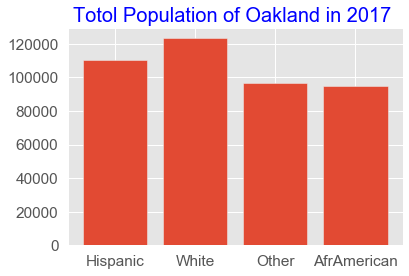

In [228]:
pop_count = pd.DataFrame(
    {'Population': list(total_pop_oakland_in_2017(425204)), 
     'Race': ['Hispanic', 'White', 'Other', 'AfrAmerican']}
)
x = np.arange(len(pop_count['Race']))

fig, ax = plt.subplots()

bars = ax.bar(x, pop_count['Population'], )
ax.set_xticks(x)
ax.set_xticklabels(pop_count['Race'])
ax.set_title("Totol Population of Oakland in 2017 ", color = 'blue', fontsize = 20)

In [238]:
#Function Count the number of Male and Female from Race


def Count_Sex_by_race(Male, Female):
    Count_Hispa_male,Count_Hispa_female= 0,0 
    Count_Other_male, Count_Other_female = 0,0
    Count_White_male,Count_White_female = 0,0
    Count_AfrAmeri_male, Count_AfrAmeri_female =  0,0
    
    for idx, key in enumerate(df.Race):
        if key == 'Hispanic':
            if df.Sex[idx] == "Male":
                Count_Hispa_male += 1
            else: 
                
                Count_Hispa_female +=1
        if key == 'Other':
            if df.Sex[idx] == "Male":
                Count_Other_male += 1
            else: 
                Count_Other_female +=1
                
        if key == 'White':
            if df.Sex[idx] == "Male":
                Count_White_male += 1
            else: 
                Count_White_female +=1
                
        if key == 'Afr American':
            if df.Sex[idx] == "Male":
                Count_AfrAmeri_male += 1
            else: 
                Count_AfrAmeri_female +=1
                
    print("\t# Data break down by Sex and Race")           
    print(f"Hispanic Male = {Count_Hispa_male},\tand Female = {Count_Hispa_female}")
    print(f"Other Male = {Count_Other_male},\tand Female = {Count_Other_female}")
    print(f"White Male = {Count_White_male},\tand Female = {Count_White_female}")
    print(f"AfriAmeri Male= {Count_AfrAmeri_male}, and Female = {Count_AfrAmeri_female}")
    Male = Count_Hispa_male + Count_Other_male + Count_Other_male + Count_White_male + Count_AfrAmeri_male
    Female = Count_Hispa_female + Count_Other_female + Count_Other_female + Count_White_female + Count_AfrAmeri_female
    
    return Male, Female

Male, Female = 0, 0
print(Count_Sex_by_race(Male, Female))

	# Data break down by Sex and Race
Hispanic Male = 578,	and Female = 121
Other Male = 77,	and Female = 23
White Male = 115,	and Female = 83
AfriAmeri Male= 1307, and Female = 440
(2154, 690)


In [ ]:
#

In [259]:
count_each_male = pd.DataFrame(
    {'Male_count_per_race': list(Count_by_race(Hispanic,Other,White,AfrAmerican)),
     'Race': ['Hispanic ', 'Other', 'White ', 'AfrAmerican']})

Hispanic = 699
Other = 100
White = 198
AfrAmerican = 1747
Total = 2744


Text(0.5, 1.0, 'Traffic Violation by Sex and Race ')

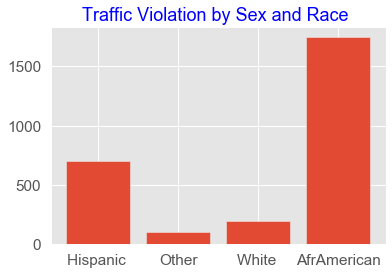

In [263]:

x = np.arange(len(count_each_male['Race']))

fig, ax = plt.subplots()

bars = ax.bar(x, count_each_male['Male_count_per_race'])
ax.set_xticks(x)
ax.set_xticklabels(count_each_male['Race'])
ax.set_title("Traffic Violation by Sex and Race ",color = 'blue', fontsize = 18)



Text(0.5, 1.0, 'Traffic Violation by Gender and Race ')

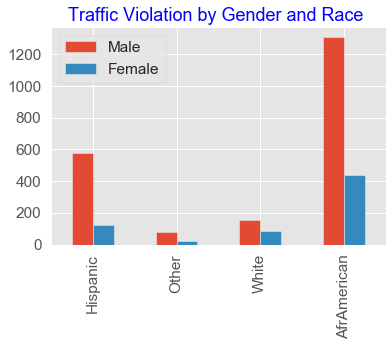

In [262]:
Male = [578 , 77, 155, 1307]
Female = [121, 23, 83, 440]
index = ['Hispanic', 'Other', 'White','AfrAmerican']
df = pd.DataFrame({'Male': Male,
                    'Female': Female}, index=index)
ax = df.plot.bar()
ax.set_title("Traffic Violation by Gender and Race ",color = 'blue', fontsize = 18)




#THE HYPOTHESES:

In [300]:
#Description, The sameple is taken from the street camera record over the period 2016 and 2017.
# The Hypthesis is Two Samples of Oakland Residents based on Race, and One Categorical Variable:

#Variable = Traffic_violation
sample_one = AfrAmerican = 1747
sample_two = Hispanic = 699
sample_three = White = 198
sample_four = Other = 100

Total_sample_size =  Hispanic + AfrAmerican + White + Other
proportions_sample_one = AfrAmerican / Total_sample_size
proportions_sample_two = Hispanic /Total_sample_size
print("proportion_sample_one = {:2.3f}".format(proportions_sample_one))
print("proportion_sample_two = {:2.3f}".format(proportions_sample_two))


proportion_sample_one = 0.637
proportion_sample_two = 0.255


In [ ]:
#The Hypotheses
'Ho = Null Hypotheses there is no difference is traffic violation' 
'Ha = alternate Hypotheses AfrAmerican traffic violatin is greater than Hispanic'
#Description P_value | Null Hypotheses < 0.05 reject Null Hypotheses 
p_value = 0.05


In [306]:
shared_sample_freq = (sample_one + sample_two) / Total_sample_size
print("shared_sample_freq : ", shared_sample_freq)

shared_sample_variance =  ( sample_one + sample_two)\
* shared_sample_freq * (1 - shared_sample_freq)/(Total_sample_size)

print("shared_sample_variance :", shared_sample_variance)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))


shared_sample_freq :  0.891399416909621
shared_sample_variance : 0.08629325448218297


Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

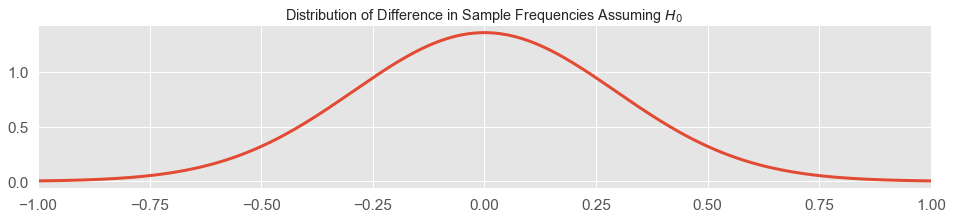

In [307]:

fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [308]:
sample_one_freq = sample_one/Total_sample_size
sample_two_freq = sample_two /Total_sample_size
difference_in_sample_proportions = sample_one_freq - sample_two_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.38


In [311]:

p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for traffic violation frequency comparison: {:2.2f}".format(p_value))

p-value for traffic violation frequency comparison: 0.10


Text(0.5, 1.0, 'p-value Region')

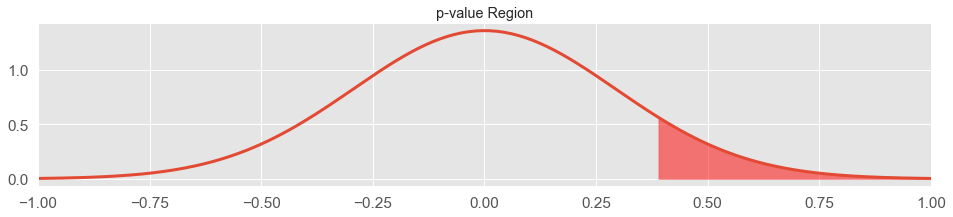

In [313]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Region")

In [ ]:
#Conclusion 
"The p_value is 0.1 which is twice greater than the critical value 0.05. Thus There is no\
evidence suggest that the Null Hypotheses is Fasle."